## Image Preprocessing Notebook

In [55]:
import cv2
from pathlib import Path
import matplotlib.pyplot as plt
import os
import numpy as np

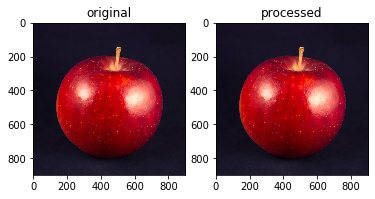

In [56]:
#read image using this, provide only class specific path and can read image in color and gray
#image = class specific path such as "apple/apple_01.jpg"
# in_color = default value is 1 means read image in color, otherwise use 0 for gray
def read_image(image, in_color = 1):
    base_path = "../Image-Data-Collection/images/image_classification/"
    image_path = os.path.join(base_path, image)
    return cv2.imread(image_path, in_color)

img_orig = read_image("apple/apple_02.jpg")

def show_image(img_processed, orignal = img_orig):
    fig, ax = plt.subplots(1,2)
    
    #plot original image
    ax[0].set_title("original")
    ax[0].imshow(cv2.cvtColor(orignal, cv2.COLOR_BGR2RGB))
    
    #plot processed image
    ax[1].set_title("processed")
    ax[1].imshow(cv2.cvtColor(img_processed, cv2.COLOR_BGR2RGB))
    plt.show()
    
show_image(img_orig)

### Color spaces

Read in Grayscale

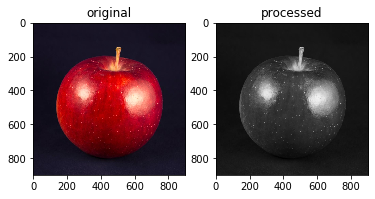

In [57]:
img_gray = cv2.cvtColor(img_orig, cv2.COLOR_BGR2GRAY)
show_image(img_gray)

Read in HSV

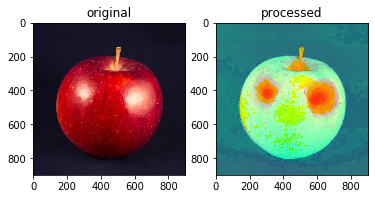

In [58]:
img_hsv = cv2.cvtColor(img_orig, cv2.COLOR_BGR2HSV)
show_image(img_hsv)

### Sharpening

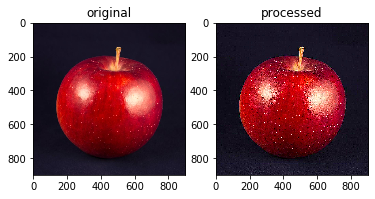

In [59]:
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1,9,-1], 
                              [-1,-1,-1]])

# applying different kernels to the input image
img_sharpened = cv2.filter2D(img_orig, -1, kernel_sharpening)
show_image(img_sharpened)

### Thresholding

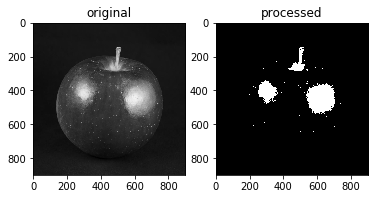

In [60]:
ret,img_thresholded = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
show_image(img_thresholded, img_gray)

Adaptive Thresholding - use it when its difficult to decide the threshold value, it will calculate the threshold value smarlty using the neighbourhood mean values and others.

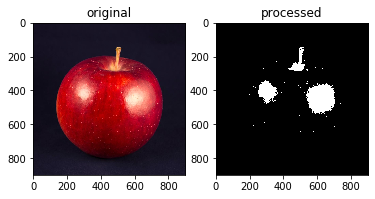

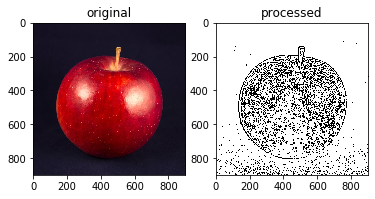

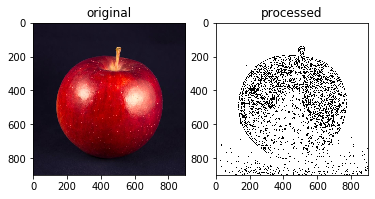

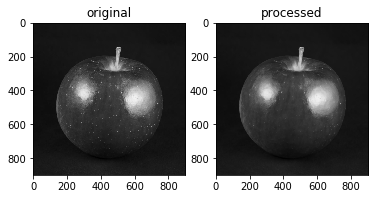

After Median Blur


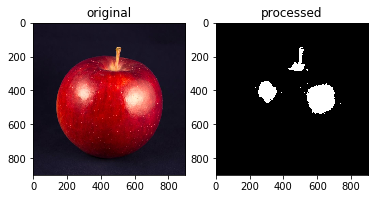

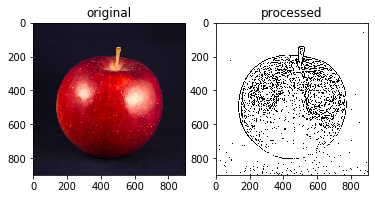

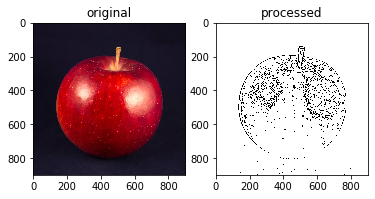

In [61]:
ret,th1 = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)
show_image(th1)

th2 = cv2.adaptiveThreshold(img_gray,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
show_image(th2)

th3 = cv2.adaptiveThreshold(img_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
show_image(th3)

#after median blur
img_blur = cv2.medianBlur(img_gray,5)
show_image(img_blur, img_gray)

print("After Median Blur")

ret,th1 = cv2.threshold(img_blur,127,255,cv2.THRESH_BINARY)
show_image(th1)

th2 = cv2.adaptiveThreshold(img_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
show_image(th2)

th3 = cv2.adaptiveThreshold(img_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
show_image(th3)

### Geometric Transformations

Scale/Resize

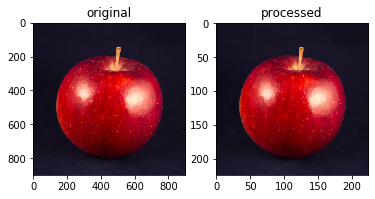

In [62]:
img_resized = cv2.resize(img_orig,(224,224), interpolation = cv2.INTER_LINEAR)
show_image(img_resized)

Translation

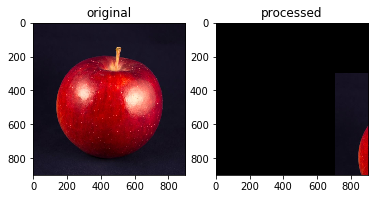

In [63]:
rows,cols = img_orig.shape[:2]

M = np.float32([[1,0,700],[0,1,300]])

#here cols and rows are the dimension of output image
img_translated = cv2.warpAffine(img_orig,M,(cols,rows))
show_image(img_translated)

Rotations

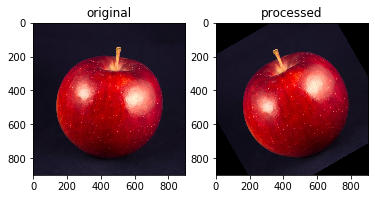

In [64]:
rows,cols = img_orig.shape[:2]

M = cv2.getRotationMatrix2D((cols/2,rows/2),30,1)
img_rotated = cv2.warpAffine(img_orig,M,(cols,rows))

show_image(img_rotated)

Affine Transforms

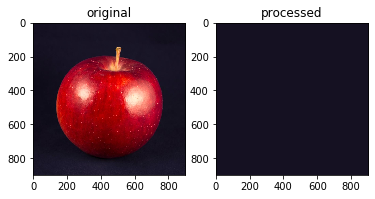

In [65]:
rows,cols,ch = img_orig.shape

pts1 = np.float32([[50,50],[50,100],[50,200]])
pts2 = np.float32([[100,100],[100,200],[100,300]])

M = cv2.getAffineTransform(pts1,pts2)

img_affinetransformed = cv2.warpAffine(img_orig,M,(cols,rows))
show_image(img_affinetransformed)

Perspective Transform

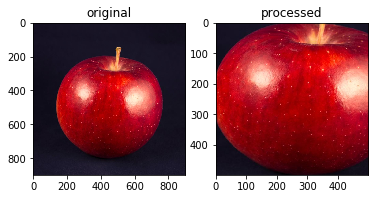

In [66]:
pts1 = np.float32([[150,200],[650, 200],[150,800],[650,800]])
pts2 = np.float32([[0,0],[500,0],[0,500],[500,500]])

M = cv2.getPerspectiveTransform(pts1,pts2)

img_prespective_transformed = cv2.warpPerspective(img_orig,M,(500,500))
show_image(img_prespective_transformed)

### Smoothing/Blurring i.e removing noise

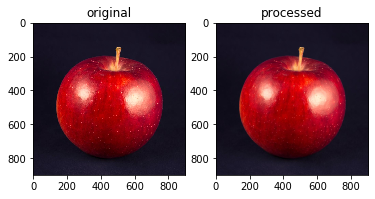

In [67]:
#5x5 kernel
kernel = np.ones((5,5),np.float32)/25

img_blurred = cv2.filter2D(img_orig,-1,kernel)
show_image(img_blurred, img_orig)

its an simple technique which takes average of pixels in kernel window

Gaussian Blur - It uses Gaussian Kernel

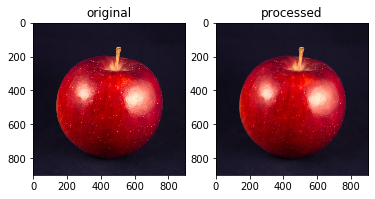

In [68]:
img_gaussian_blur = cv2.GaussianBlur(img_orig,(5,5),0)
show_image(img_gaussian_blur)

Median Filtering - It's veru effective in removing salt and pepper noise, and remember it replaces pixel values from the values which already exists in image, unlike gaussian and average kernel filters hence it is more effective

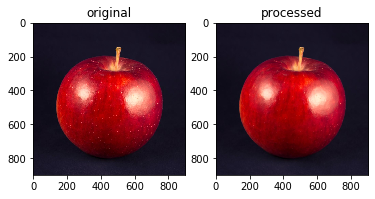

In [69]:
img_median_blur = cv2.medianBlur(img_orig,5)
show_image(img_median_blur)

Bilateral Filter - above all techniques blurs edges also, but not this one - use it if u have a requirement where u do not want to blur edges.

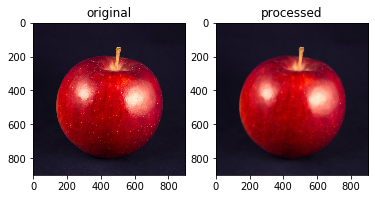

In [70]:
img_bilateral_blur = cv2.bilateralFilter(img_orig,11,150,150)
show_image(img_bilateral_blur)

For Image De Noising, use this method, it is computationally expensive but quite popular algorithm used in photography

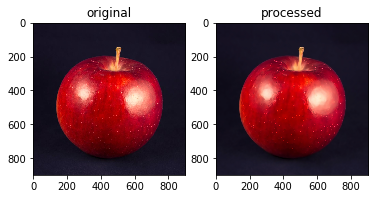

In [71]:
dst = cv2.fastNlMeansDenoisingColored(img_orig, None, 7, 21, 10, 10)
show_image(dst)

### Morphological Transformations

Erosions and dilations are the basic ones and Opening, Closing and Gradient are their variations

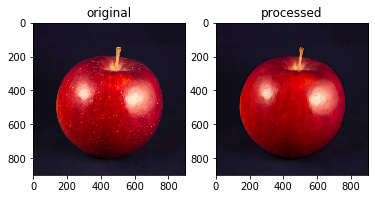

In [72]:
kernel = np.ones((5,5),np.uint8)
img_eroded = cv2.erode(img_orig,kernel,iterations = 1)
show_image(img_eroded)

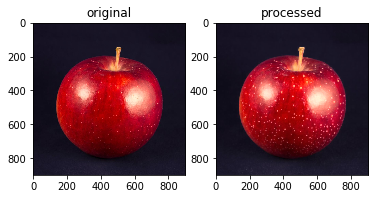

In [73]:
img_dilated = cv2.dilate(img_orig,kernel,iterations = 1)
show_image(img_dilated)

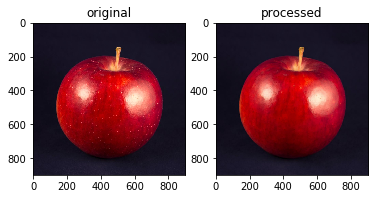

In [74]:
img_opened = cv2.morphologyEx(img_orig, cv2.MORPH_OPEN, kernel)
show_image(img_opened)

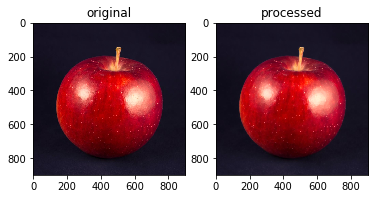

In [75]:
img_closed = cv2.morphologyEx(img_orig, cv2.MORPH_CLOSE, kernel)
show_image(img_closed)

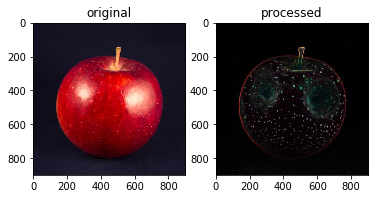

In [76]:
img_gradient = cv2.morphologyEx(img_orig, cv2.MORPH_GRADIENT, kernel)
show_image(img_gradient)

### Image Gradients
High Pass filters - Sobel, Scharr, Laplacian

error: OpenCV(4.3.0) c:\projects\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<1,-1,-1>,struct cv::impl::A0xe227985e::Set<3,4,-1>,struct cv::impl::A0xe227985e::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)


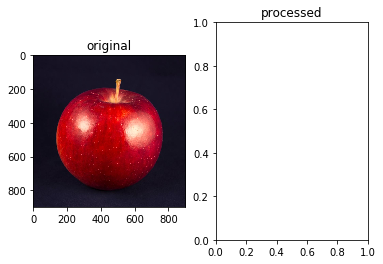

In [80]:
table_orig = read_image("table/table_45.jpg", 0)

laplacian = cv2.Laplacian(table_orig,cv2.CV_64F)
sobelx = cv2.Sobel(table_orig,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(table_orig,cv2.CV_64F,0,1,ksize=5)
sobel_OR = cv2.bitwise_or(sobelx, sobely)
show_image(sobel_OR, img_orig)

plt.subplot(2,2,1),plt.imshow(table_orig,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

### Canny Edge Detection
It is combination of multiple steps such as
1. Noise Reduction
2. finding intensity gradient of the image
3. Non maximum suppression
4. Hysteris Thresholding

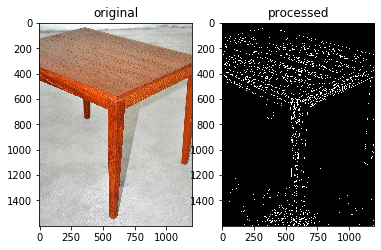

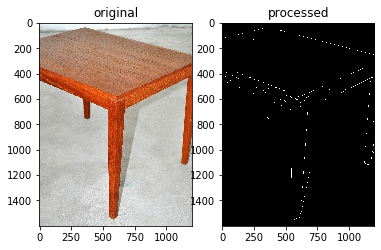

In [82]:
table_orig = read_image("table/table_45.jpg", 1)
img_edges = cv2.Canny(table_orig,100,200)
show_image(img_edges, table_orig)

img_edges = cv2.Canny(cv2.medianBlur(table_orig, 5), 100, 200)
show_image(img_edges, table_orig)

### Image Pyramids
Different way of resizing an image - upscale and downscale image by half the dimensions

In [ ]:
smaller = cv2.pyrDown(img_orig)
larger = cv2.pyrUp(smaller)

show_image(smaller)
show_image(larger)

NOTE: how upscaling an downscaled image will reduce its quality as u can see above.

### Arithmetic Operations


In [ ]:
M = np.ones(img_orig.shape, dtype = "uint8") * 175 

# We use this to add this matrix M, to our image
# Notice the increase in brightness
added = cv2.add(img_orig, M)
show_image(added)

# Likewise we can also subtract
# Notice the decrease in brightness
subtracted = cv2.subtract(img_orig, M)
show_image(subtracted)